In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [386]:
data = pd.read_csv("imports-85.data")
data.dropna(how = "all")
data = data.drop('normalized-losses',axis=1)
data = data[(data != '?').all(axis=1)]

C:\Users\baraz\Anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [387]:
data.head(100)


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
105,3,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
106,1,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
107,0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900


In [388]:
data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

In [390]:
data['price'].describe()

count      193
unique     178
top       7295
freq         2
Name: price, dtype: object

In [391]:
data['make'].value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

In [392]:
data['price'].describe

<bound method NDFrame.describe of 0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 193, dtype: object>

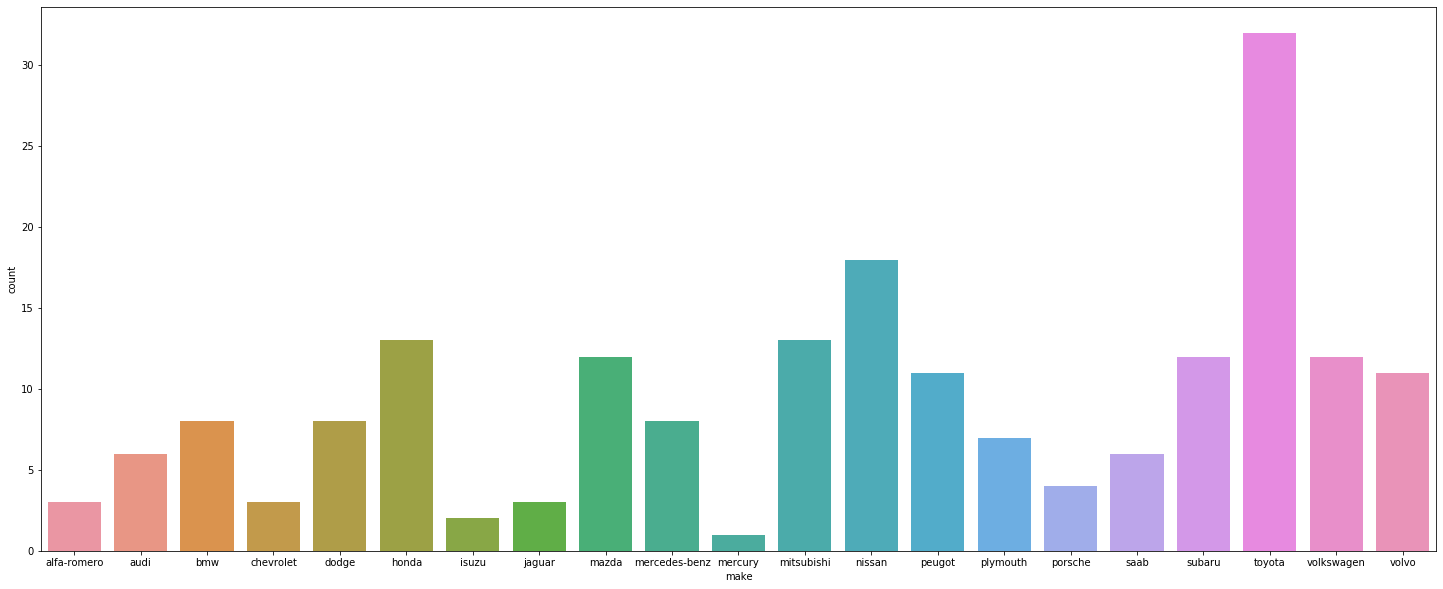

In [393]:
plt.figure(figsize = (25,10))
sns.countplot(data['make'])

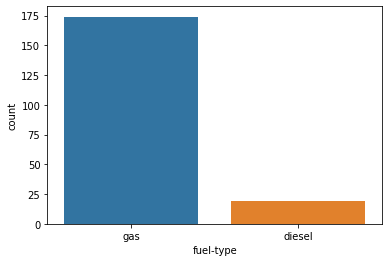

In [394]:
sns.countplot(data['fuel-type'])

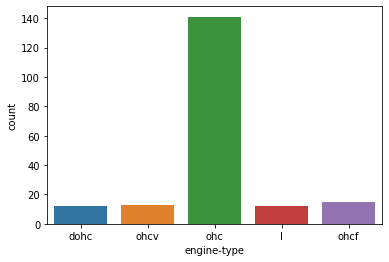

In [395]:
sns.countplot(data['engine-type'])

In [396]:
le = LabelEncoder()

In [397]:
data['make'] = le.fit_transform(data['make'])
data['fuel-type'] = le.fit_transform(data['fuel-type'])
data['drive-wheels'] = le.fit_transform(data['drive-wheels'])
data['body-style'] = le.fit_transform(data['body-style'])
data['aspiration'] = le.fit_transform(data['aspiration'])
data['num-of-doors'] = le.fit_transform(data['num-of-doors'])
data['engine-type'] = le.fit_transform(data['engine-type'])
data['engine-location'] = le.fit_transform(data['engine-location'])
data['num-of-cylinders'] = le.fit_transform(data['num-of-cylinders'])
data['fuel-system'] = le.fit_transform(data['fuel-system'])

In [398]:
data['engine-type'].unique()

array([0, 4, 2, 1, 3])

In [399]:
data.head(30)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.00,111,5000,21,27,13495
1,3,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.00,111,5000,21,27,16500
2,1,0,1,0,1,2,2,0,94.5,171.2,...,152,4,2.68,3.47,9.00,154,5000,19,26,16500
3,2,1,1,0,0,3,1,0,99.8,176.6,...,109,4,3.19,3.40,10.00,102,5500,24,30,13950
4,2,1,1,0,0,3,0,0,99.4,176.6,...,136,4,3.19,3.40,8.00,115,5500,18,22,17450
5,2,1,1,0,1,3,1,0,99.8,177.3,...,136,4,3.19,3.40,8.50,110,5500,19,25,15250
6,1,1,1,0,0,3,1,0,105.8,192.7,...,136,4,3.19,3.40,8.50,110,5500,19,25,17710
7,1,1,1,0,0,4,1,0,105.8,192.7,...,136,4,3.19,3.40,8.50,110,5500,19,25,18920
8,1,1,1,1,0,3,1,0,105.8,192.7,...,131,4,3.13,3.40,8.30,140,5500,17,20,23875
10,2,2,1,0,1,3,2,0,101.2,176.8,...,108,4,3.50,2.80,8.80,101,5800,23,29,16430


In [400]:
X = data.drop('price', axis=1)
y = data['price']

In [401]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=42)

In [402]:
#standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
best = 0

# train model

In [403]:
for _ in range(50):
    x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.1)

    
    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        best = acc
        with open("carData.pickle","wb") as f:
            pickle.dump(linear,f)


In [404]:
print(best)

0.961022592425022
